In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [71]:
df=pd.read_csv('winequalityN.csv')

# Using pandas profiling to get overall idea about data

In [59]:
from pandas_profiling import ProfileReport

In [60]:
profile=ProfileReport(df)

In [6]:
profile.to_file('wine_analysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [62]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [63]:
df["fixed acidity"].median()

7.0

In [18]:
df["fixed acidity"].max()

15.9

In [19]:
df["fixed acidity"].min()

3.8

In [27]:
df1=df["fixed acidity"].fillna(df["fixed acidity"].median())

In [30]:
df2=df["volatile acidity"].fillna(df["volatile acidity"].median())

In [28]:
df["fixed acidity"]=df1

In [31]:
df['volatile acidity']=df2

# Cheking there is any realtionship between missing values in the data  

In [64]:
missing_data_summary = df.isnull().mean()
print(missing_data_summary)
correlation_matrix = df.isnull().corr()
print(correlation_matrix)

type                    0.000000
fixed acidity           0.001539
volatile acidity        0.001231
citric acid             0.000462
residual sugar          0.000308
chlorides               0.000308
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.001385
sulphates               0.000616
alcohol                 0.000000
quality                 0.000000
dtype: float64
                      type  fixed acidity  volatile acidity  citric acid  \
type                   NaN            NaN               NaN          NaN   
fixed acidity          NaN       1.000000          0.110580    -0.000844   
volatile acidity       NaN       0.110580          1.000000    -0.000755   
citric acid            NaN      -0.000844         -0.000755     1.000000   
residual sugar         NaN      -0.000689         -0.000616    -0.000377   
chlorides              NaN      -0.000689         -0.000616    -0.000377   
free sulfur dioxide    N

# Insight

There is no relationship in missing of data in the dataset

# Filling of the data with nan value with median value in place

In [72]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [73]:
for column in numeric_features:
    median = df[column].median()
    df[column].fillna(median, inplace=True)

In [74]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Distibution curve of data

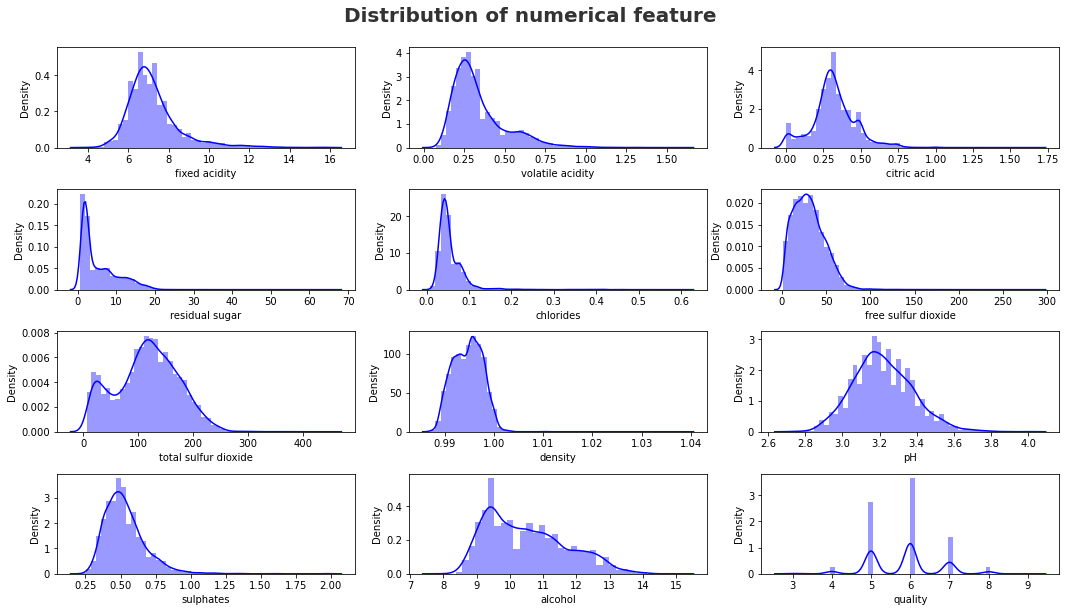

In [75]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Insight

1.From the distribution curve it is evident that the most of the data are left skewed

2.Outliers are also present in the data

3.total sulfur dioxide show bimodal distibution


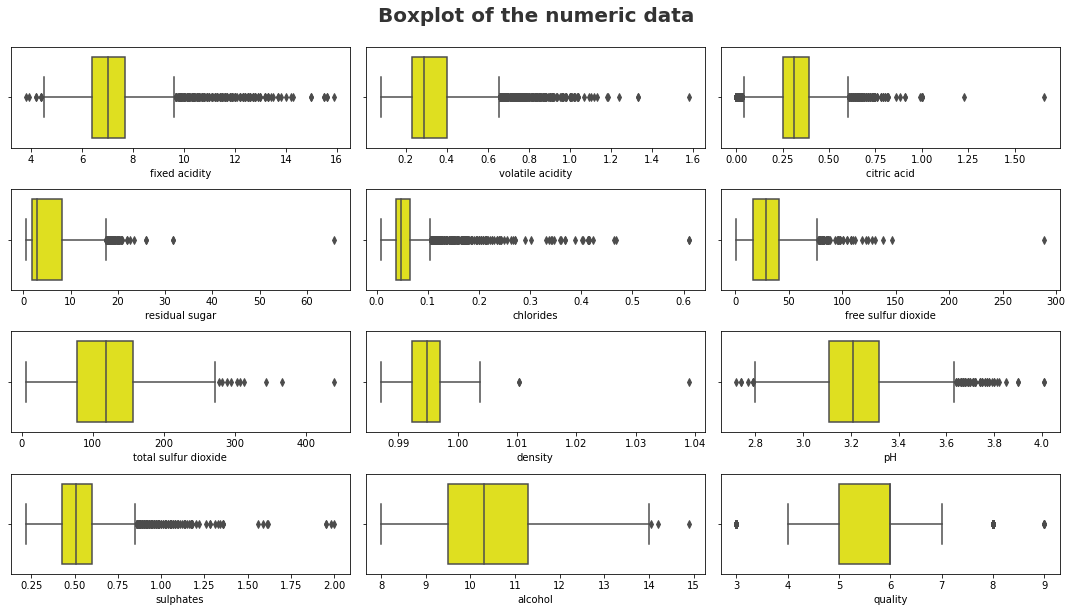

In [99]:
plt.figure(figsize=(15, 10))
plt.suptitle('Boxplot of the numeric data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]], color='yellow')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

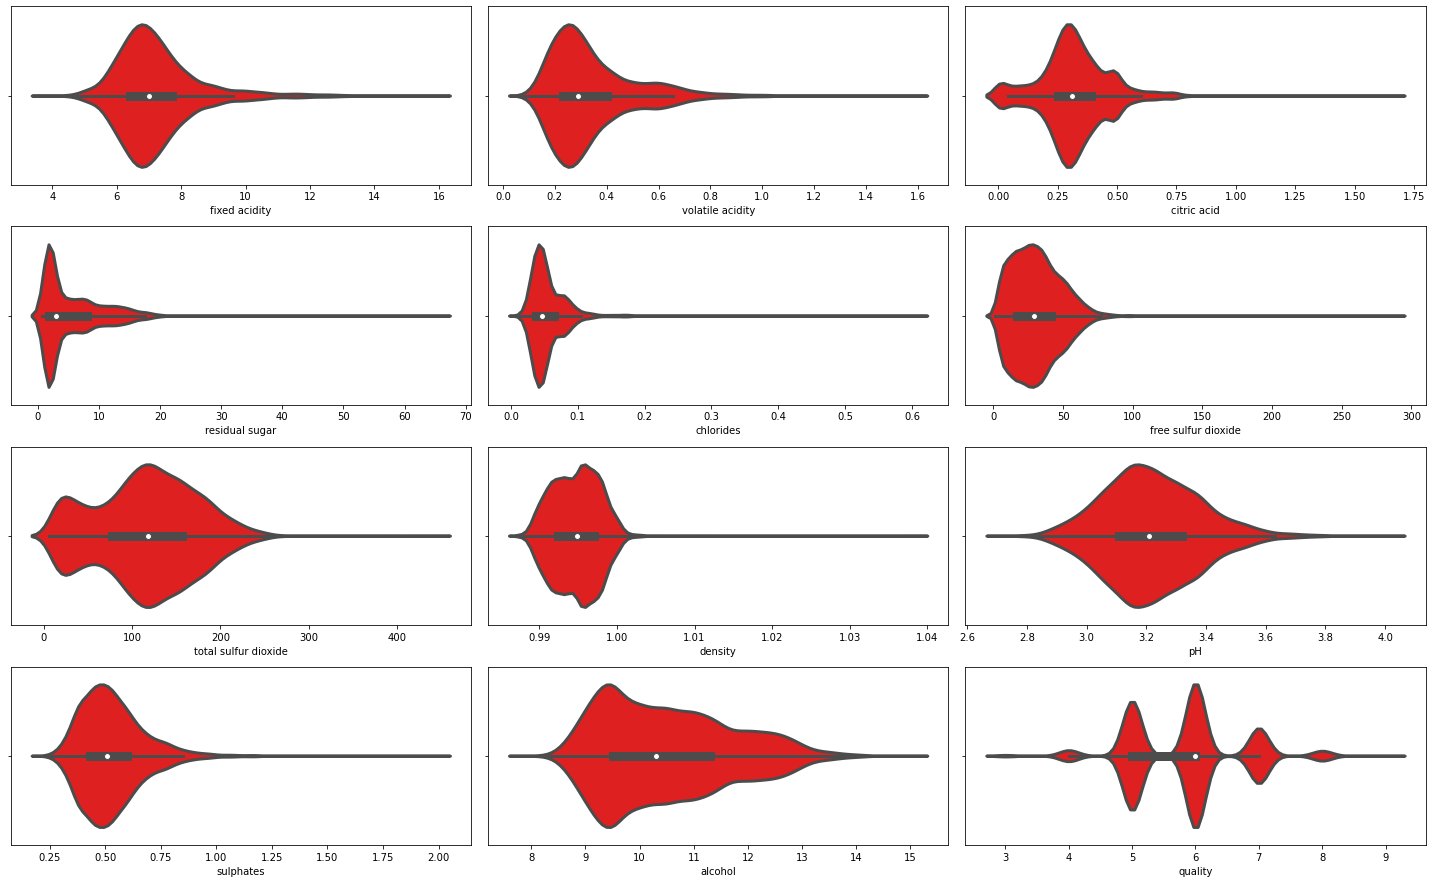

In [98]:
plt.figure(figsize=(20, 15))
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.violinplot(x=df[numeric_features[i]], color='red',linewidth=3)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [100]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

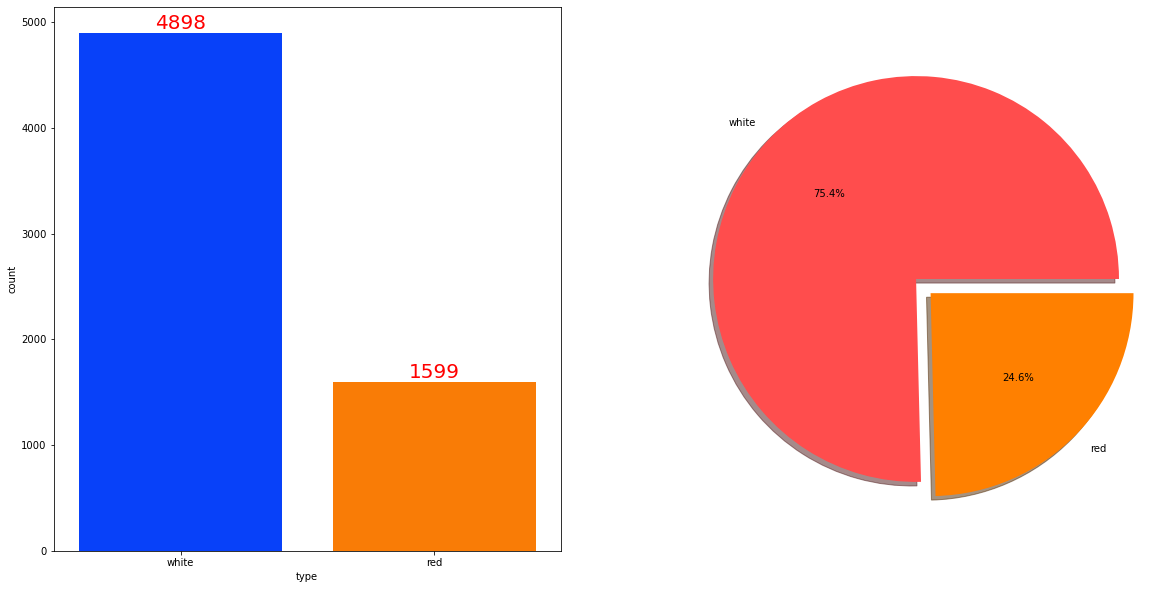

In [105]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['type'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='red',size=20)
    
plt.pie(x=df['type'].value_counts(),labels=['white','red'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

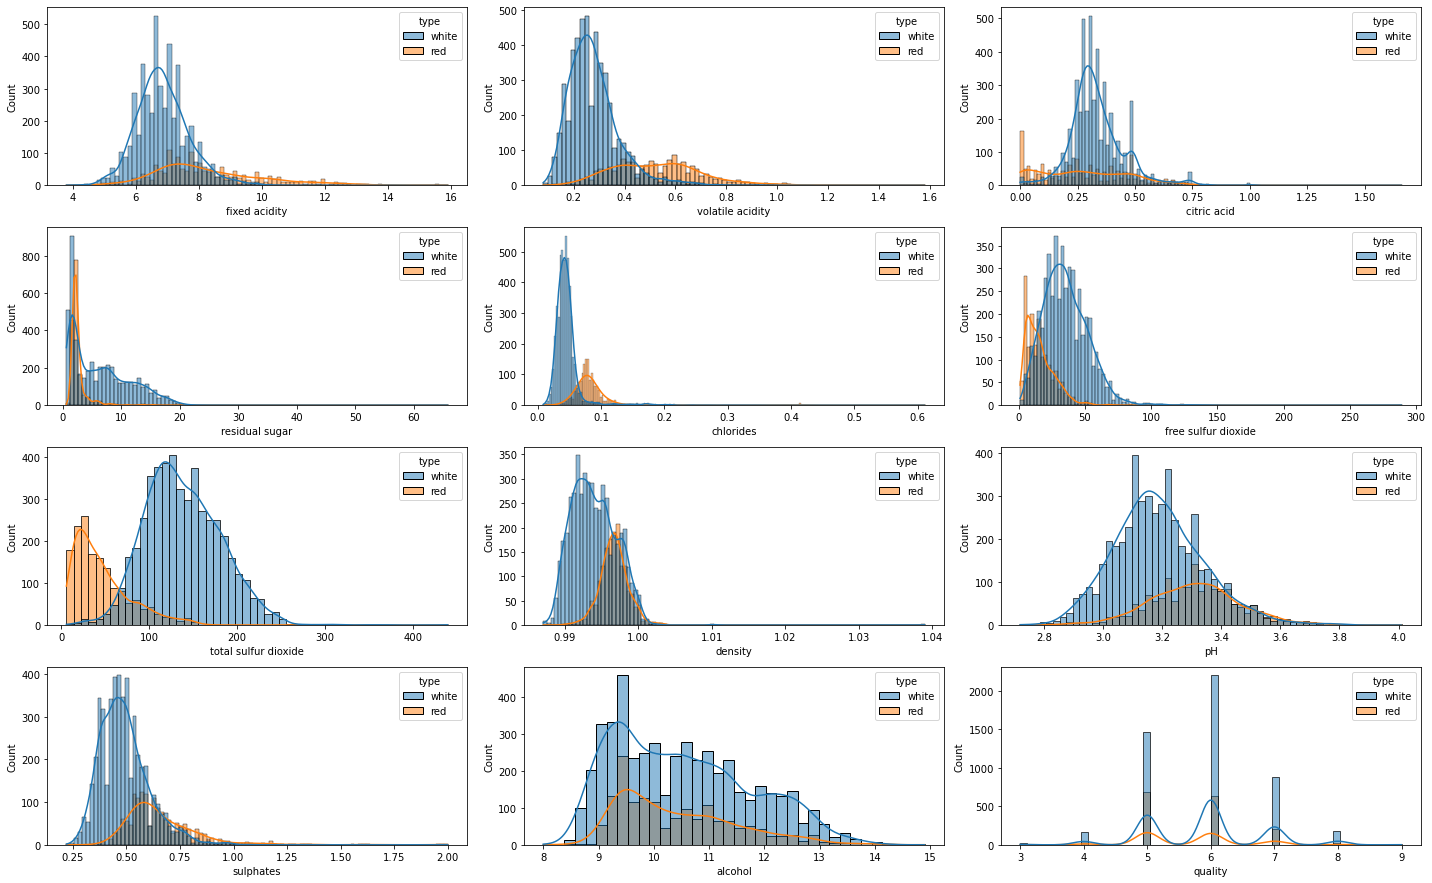

In [107]:
plt.figure(figsize=(20, 15))
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df[numeric_features[i]],kde=True, hue=df['type'])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

The white wine is more about 4898 and red wine about 1599



<Figure size 1440x1080 with 0 Axes>

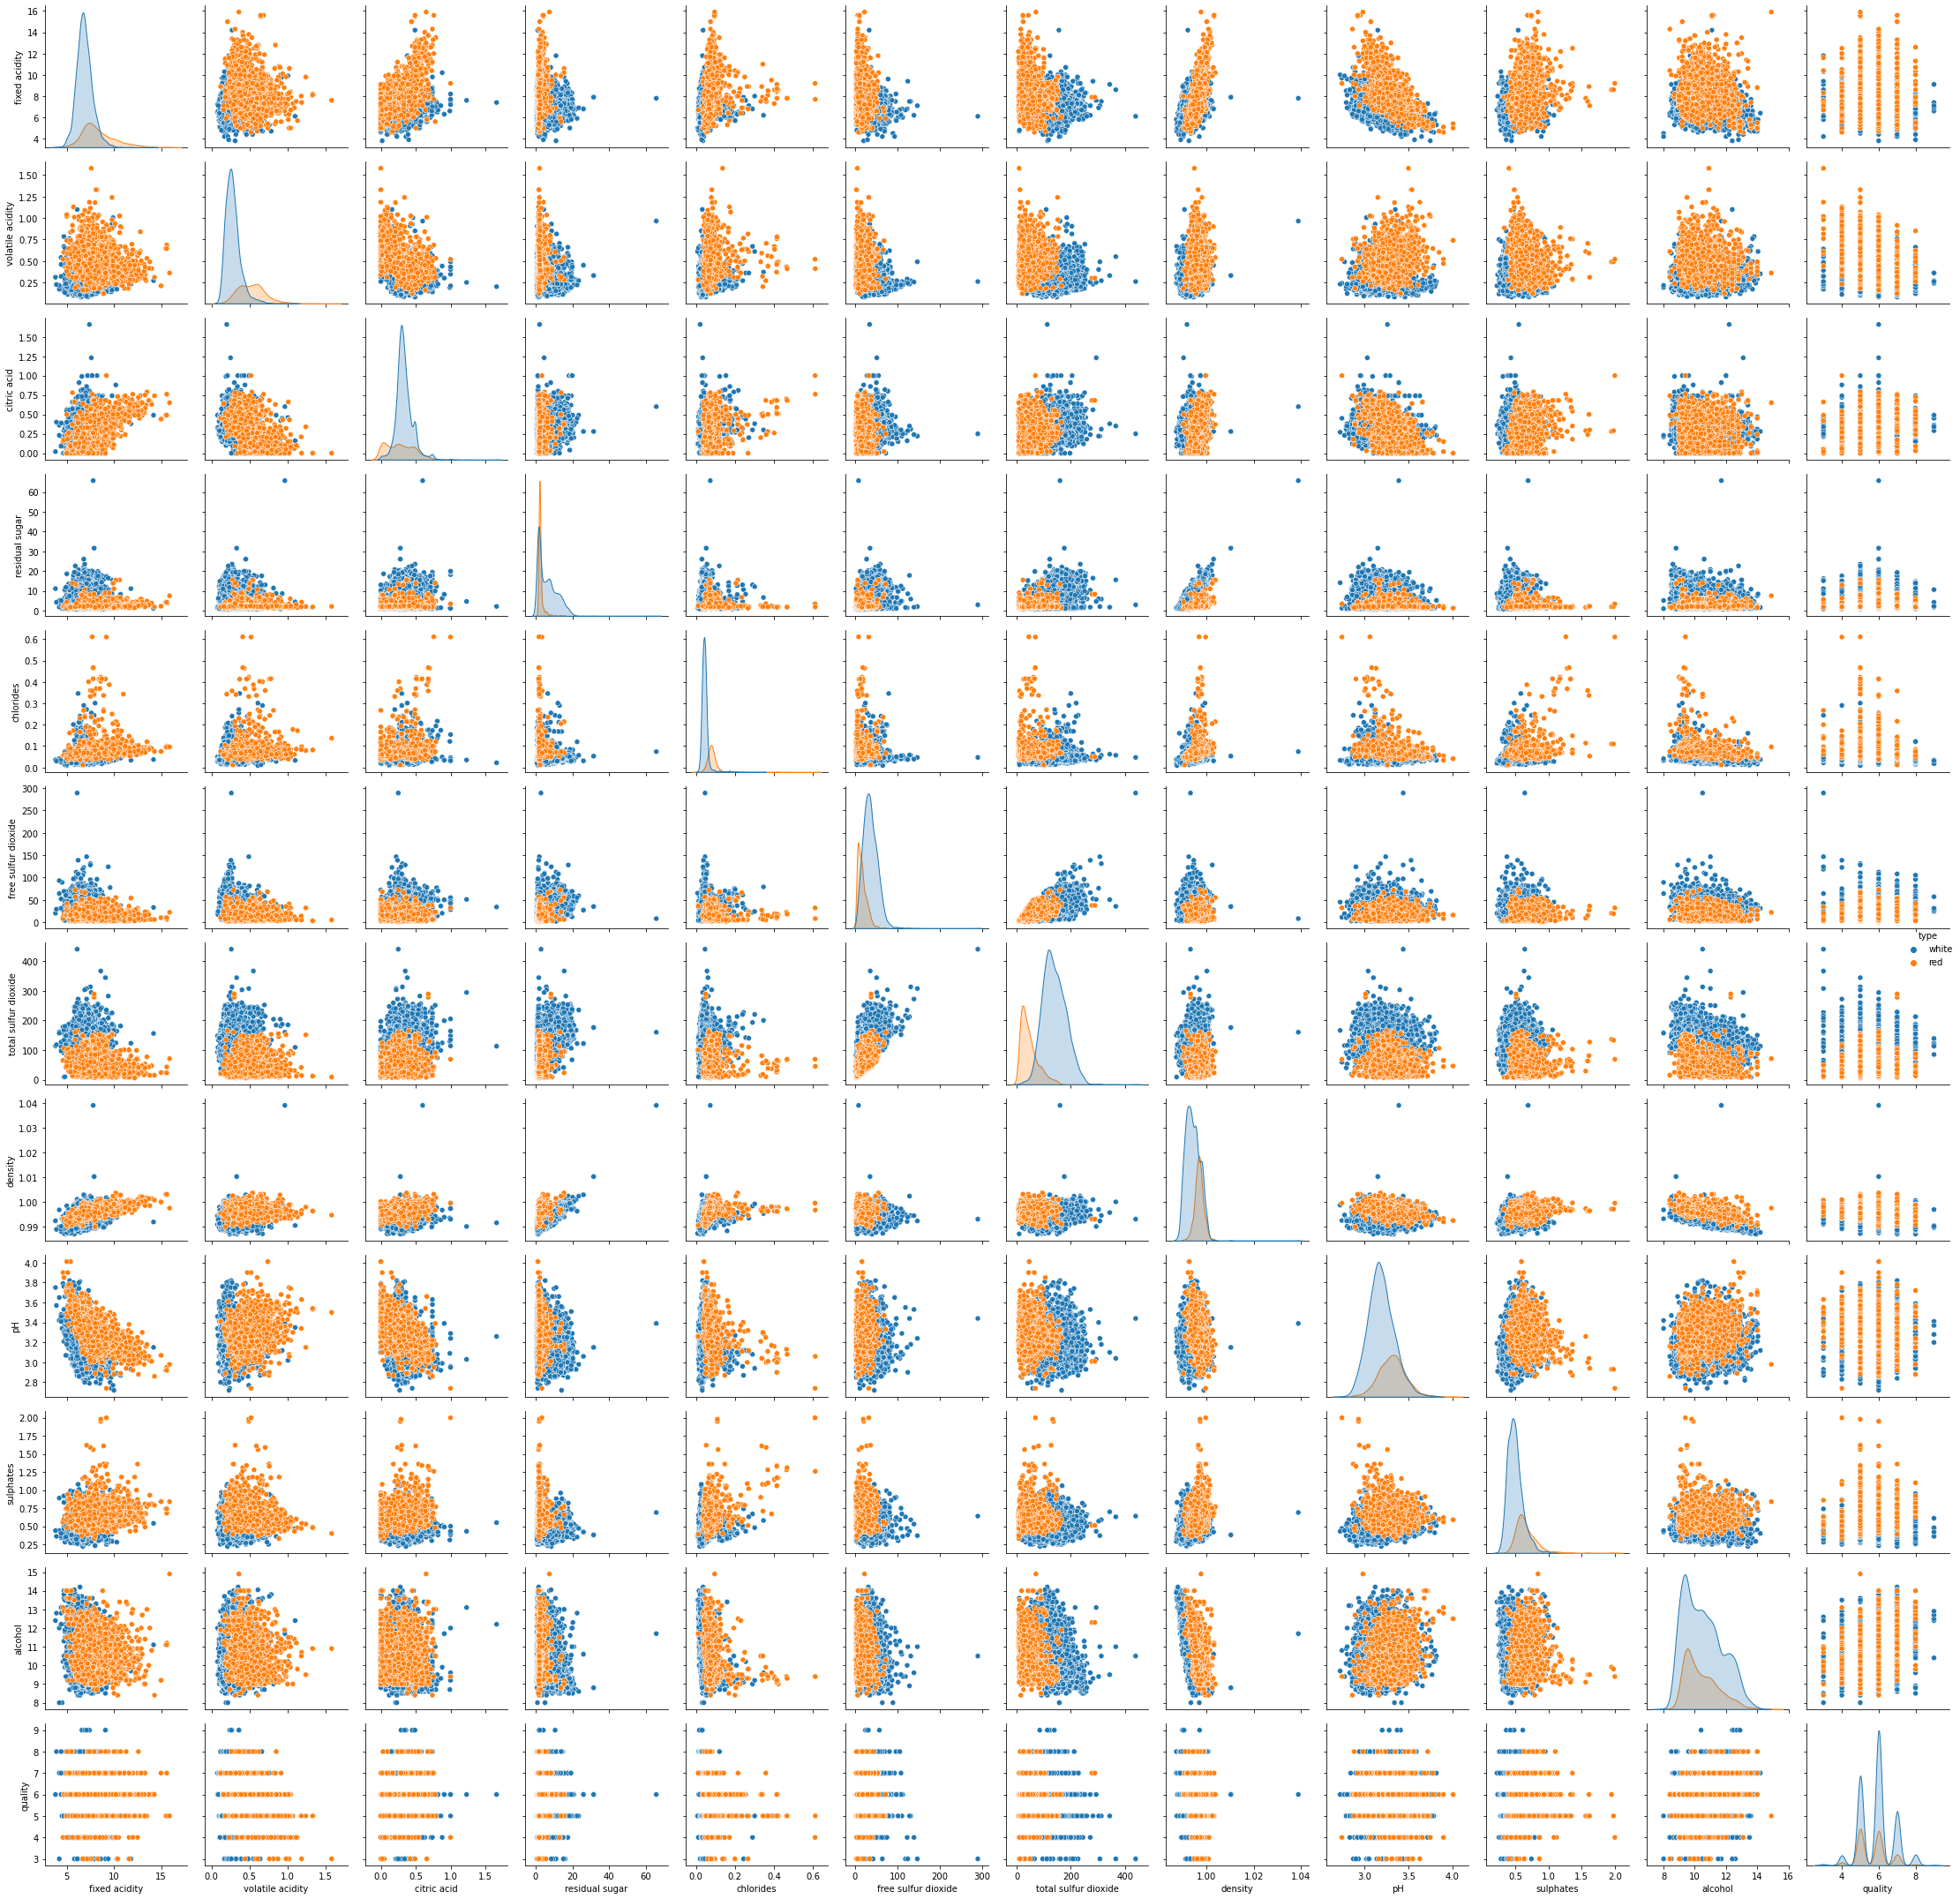

In [110]:
plt.figure(figsize=(20, 15))
sns.pairplot(df, hue='type')
plt.tight_layout()

plot indicate that wine quality parameters not showing any linear realtionship

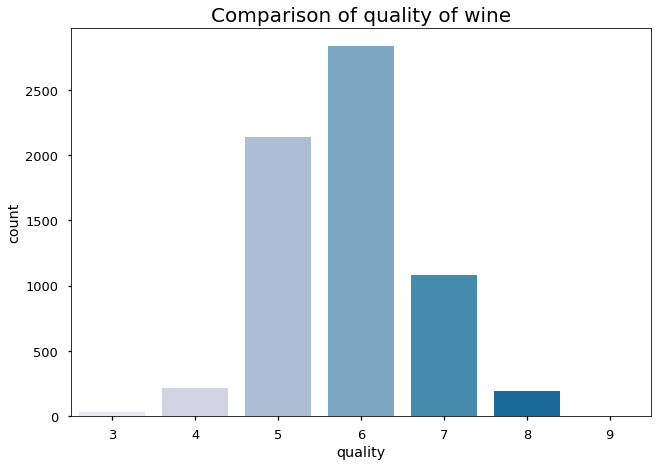

In [115]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['quality'], palette = 'PuBu')

plt.title('Comparison of quality of wine', fontweight = 30, fontsize = 20)
plt.xlabel('quality')
plt.ylabel('count')
plt.show()

# Removing outlier from the data

In [131]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[col]

In [132]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    print(numeric_features[i])
    remove_outliers_IQR(numeric_features[i])
    
    

fixed acidity
percentile25 6.4
percentile75 7.7
Upper limit 9.65
Lower limit 4.450000000000001
volatile acidity
percentile25 0.23
percentile75 0.4
Upper limit 0.655
Lower limit -0.024999999999999994
citric acid
percentile25 0.25
percentile75 0.39
Upper limit 0.6000000000000001
Lower limit 0.03999999999999998
residual sugar
percentile25 1.8
percentile75 8.1
Upper limit 17.549999999999997
Lower limit -7.6499999999999995
chlorides
percentile25 0.038
percentile75 0.065
Upper limit 0.10550000000000001
Lower limit -0.002500000000000009
free sulfur dioxide
percentile25 17.0
percentile75 41.0
Upper limit 77.0
Lower limit -19.0
total sulfur dioxide
percentile25 77.0
percentile75 156.0
Upper limit 274.5
Lower limit -41.5
density
percentile25 0.99234
percentile75 0.99699
Upper limit 1.003965
Lower limit 0.9853649999999999
pH
percentile25 3.11
percentile75 3.32
Upper limit 3.635
Lower limit 2.795
sulphates
percentile25 0.43
percentile75 0.6
Upper limit 0.855
Lower limit 0.175
alcohol
percentile25 

In [125]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

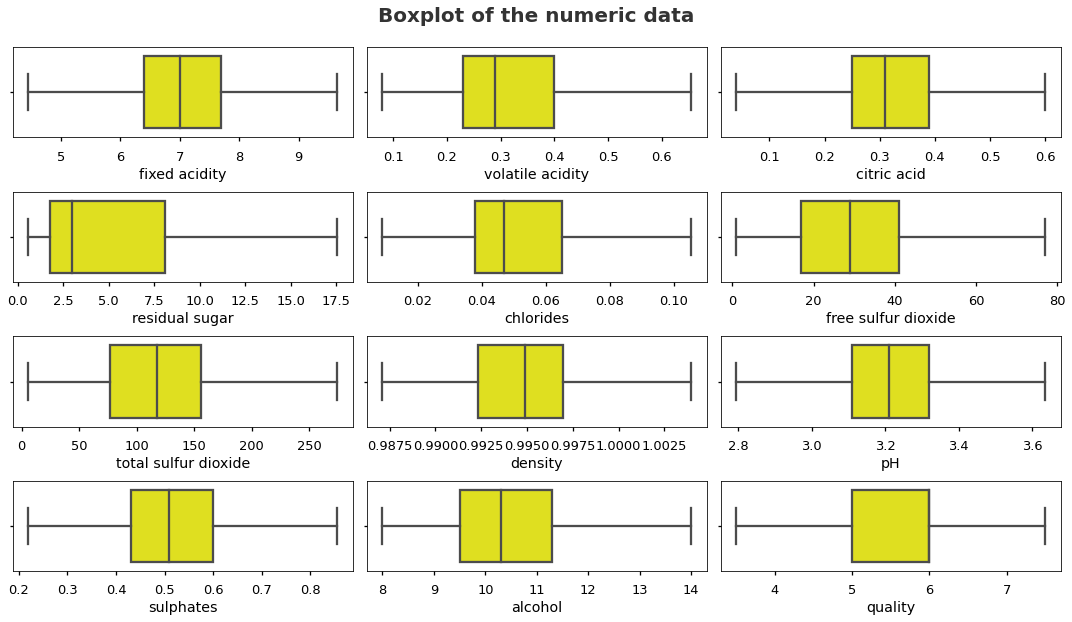

In [133]:
plt.figure(figsize=(15, 10))
plt.suptitle('Boxplot of the numeric data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df1[numeric_features[i]], color='yellow')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Skewness is reduced after we have removed ouliers using IQR Method